<a href="https://colab.research.google.com/github/matheusgastal/ENEM-Data-Analysis/blob/main/Exploring_data_enem_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preparando o ambiente, importando o drive


In [40]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/dados_enem/dados_enem_2023_limpo.csv")

### Inicialmente começamos a análise de forma mais intuitiva, observando diferença das médias entre escolas **públicas** e **privadas**




In [42]:
media_publica = df[df['TP_ESCOLA'] == "Publica"]['NOTA_MEDIA'].mean()
media_privada = df[df['TP_ESCOLA'] == "Privada"]['NOTA_MEDIA'].mean()

print(f"Média da nota (Escola Pública): {media_publica:.2f}")
print(f"Média da nota (Escola Privada): {media_privada:.2f}")


Média da nota (Escola Pública): 522.54
Média da nota (Escola Privada): 621.20


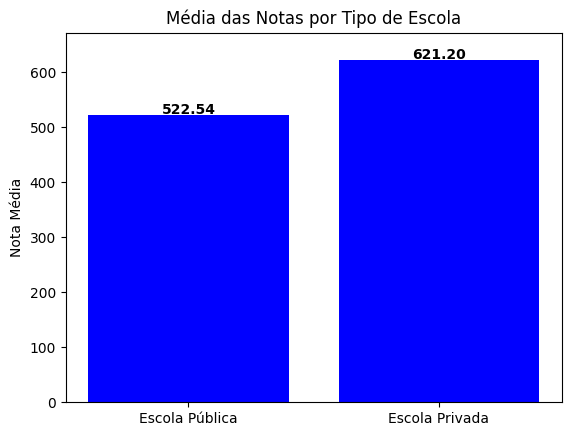

In [43]:
tipos = ['Escola Pública', 'Escola Privada']
medias = [media_publica, media_privada]

# Criar o gráfico
plt.bar(tipos, medias, color=['blue', 'blue'])
plt.title('Média das Notas por Tipo de Escola')
plt.ylabel('Nota Média')
plt.ylim(0, max(medias) + 50)  # ajusta o limite do eixo y para dar espaço
plt.grid(axis='y', linestyle='', alpha=0.7)

# Mostrar os valores em cima das barras
for i, v in enumerate(medias):
    plt.text(i, v + 2, f"{v:.2f}", ha='center', fontweight='bold')

plt.show()

É relevante analisarmos os diferentes desempenhos entre escolas públicas de diferentes tipos, o resultado foi interessante


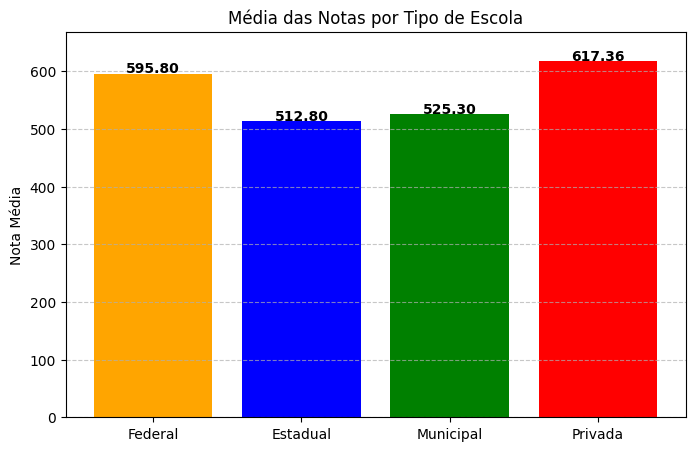

In [44]:
media_federais = df[df['TP_DEPENDENCIA_ADM_ESC'] ==  'Federal']['NOTA_MEDIA'].mean()
media_estadual = df[df['TP_DEPENDENCIA_ADM_ESC'] ==  'Estadual']['NOTA_MEDIA'].mean()
media_municipal = df[df['TP_DEPENDENCIA_ADM_ESC'] ==  'Municipal']['NOTA_MEDIA'].mean()
media_privada = df[df['TP_DEPENDENCIA_ADM_ESC'] ==  'Privada']['NOTA_MEDIA'].mean()

# Seu dicionário com médias
medias_por_dependencia = {
    'Federal':media_federais,
    'Estadual':media_estadual,
    'Municipal':media_municipal,
   'Privada':media_privada
}

# Separar as chaves e valores para o gráfico
tipos = list(medias_por_dependencia.keys())
medias = list(medias_por_dependencia.values())

# Criar o gráfico
plt.figure(figsize=(8,5))
plt.bar(tipos, medias, color=['orange', 'blue', 'green', 'red'])
plt.title('Média das Notas por Tipo de Escola')
plt.ylabel('Nota Média')
plt.ylim(0, max(medias) + 50)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar os valores no topo das barras
for i, v in enumerate(medias):
    plt.text(i, v + 2, f"{v:.2f}", ha='center', fontweight='bold')

plt.show()


As escolas federais tem um desempenho bem acima das demais públicas, ficando 3.5% abaixo das privadas, enquanto as escolas estaduais ficaram 17.2% e as municipais 13.95%

# Análise de renda e nota entre os diferentes tipos de escolas, incluindo diferenças entre diferentes administrações de escolas públicas

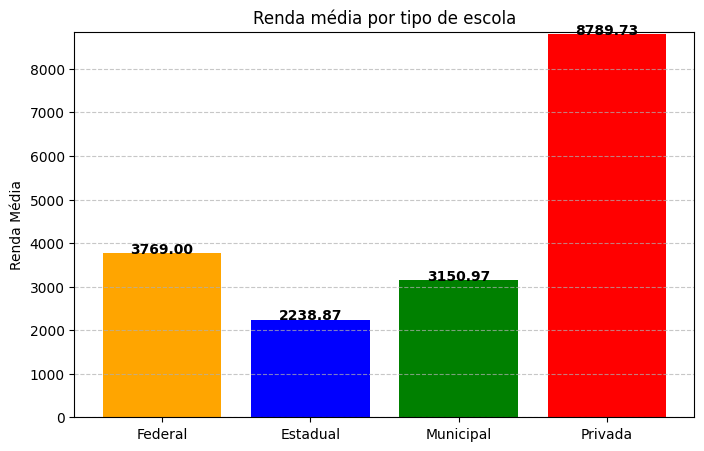

In [45]:
renda_media_privada = df[df['TP_DEPENDENCIA_ADM_ESC'] == 'Privada']['Renda_estimada'].mean()
renda_media_estadual = df[df['TP_DEPENDENCIA_ADM_ESC'] == 'Estadual']['Renda_estimada'].mean()
renda_media_municipal = df[df['TP_DEPENDENCIA_ADM_ESC'] == 'Municipal']['Renda_estimada'].mean()
renda_media_federal = df[df['TP_DEPENDENCIA_ADM_ESC'] == 'Federal']['Renda_estimada'].mean()


renda_por_dependencia = {
    'Federal': renda_media_federal,
    'Estadual': renda_media_estadual,
    'Municipal': renda_media_municipal,
    'Privada': renda_media_privada,
}


tipos = list(renda_por_dependencia.keys())
medias = list(renda_por_dependencia.values())

plt.figure(figsize=(8,5))
plt.bar(tipos, medias, color=['orange', 'blue', 'green', 'red'])
plt.title('Renda média por tipo de escola')
plt.ylabel('Renda Média')
plt.ylim(0, max(medias) + 50)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for i, v in enumerate(medias):
    plt.text(i, v + 2, f"{v:.2f}", ha='center', fontweight='bold')

plt.show()

Nesta análise, verifico a distribuição da renda familiar dos estudantes de acordo com o tipo de escola frequentada

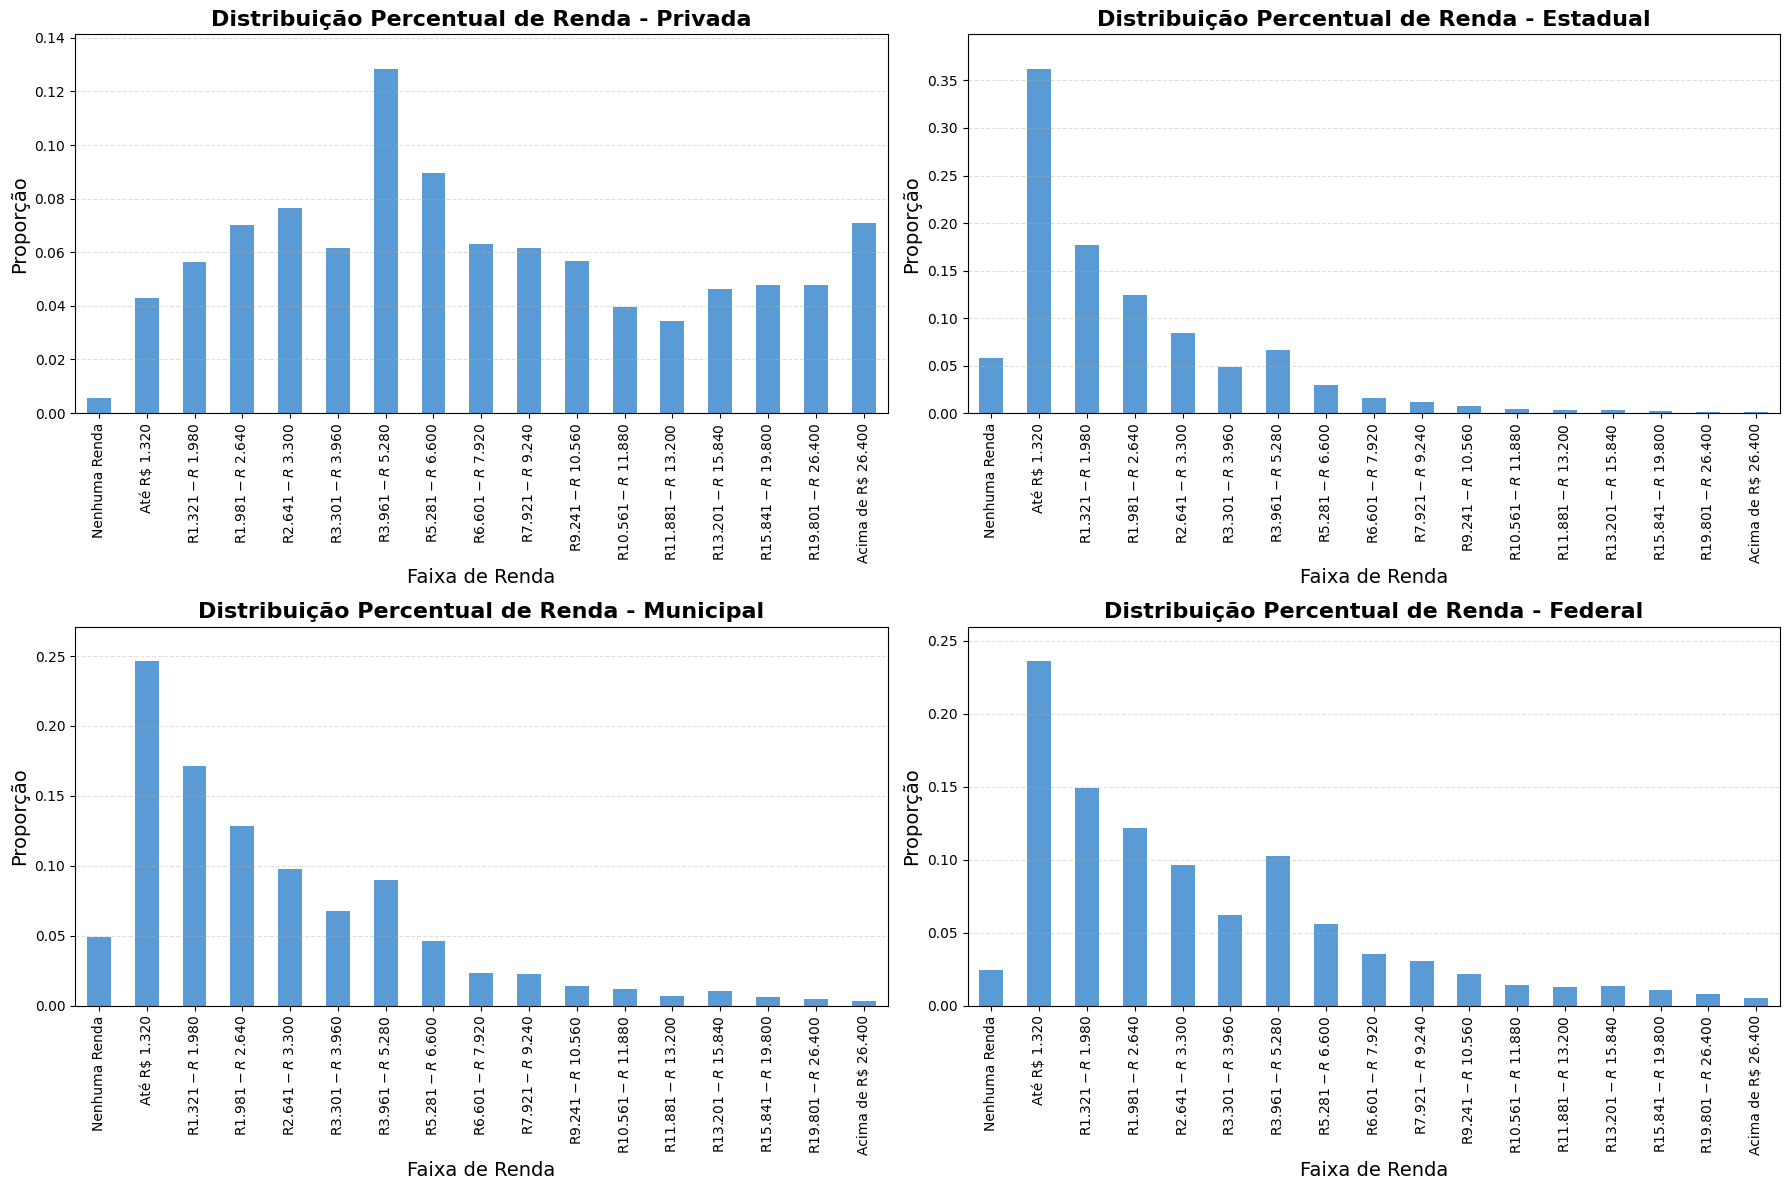

In [58]:
ordem_renda = [
    'Nenhuma Renda',
    'Até R$ 1.320',
    'R$ 1.321 - R$ 1.980',
    'R$ 1.981 - R$ 2.640',
    'R$ 2.641 - R$ 3.300',
    'R$ 3.301 - R$ 3.960',
    'R$ 3.961 - R$ 5.280',
    'R$ 5.281 - R$ 6.600',
    'R$ 6.601 - R$ 7.920',
    'R$ 7.921 - R$ 9.240',
    'R$ 9.241 - R$ 10.560',
    'R$ 10.561 - R$ 11.880',
    'R$ 11.881 - R$ 13.200',
    'R$ 13.201 - R$ 15.840',
    'R$ 15.841 - R$ 19.800',
    'R$ 19.801 - R$ 26.400',
    'Acima de R$ 26.400'
]

tipos_escola = ['Privada', 'Estadual', 'Municipal', 'Federal']

fig, axs = plt.subplots(2, 2, figsize=(18, 12))
axs = axs.flatten()

for i, tipo in enumerate(tipos_escola):
    df_tipo = df[df['TP_DEPENDENCIA_ADM_ESC'] == tipo]

    contagem_renda = df_tipo['Q006'].value_counts(normalize=True).reindex(ordem_renda, fill_value=0)
    ax = axs[i]
    contagem_renda.plot(kind='bar', ax=ax, color='#5A9BD5')


    ax.set_title(f'Distribuição Percentual de Renda - {tipo}', fontsize=16, weight='bold')
    ax.set_xlabel('Faixa de Renda', fontsize=14)
    ax.set_ylabel('Proporção', fontsize=14)
    ax.tick_params(axis='x', rotation=90, labelsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.4)
    ax.set_ylim(0, contagem_renda.max() * 1.1)

plt.tight_layout()
plt.show()

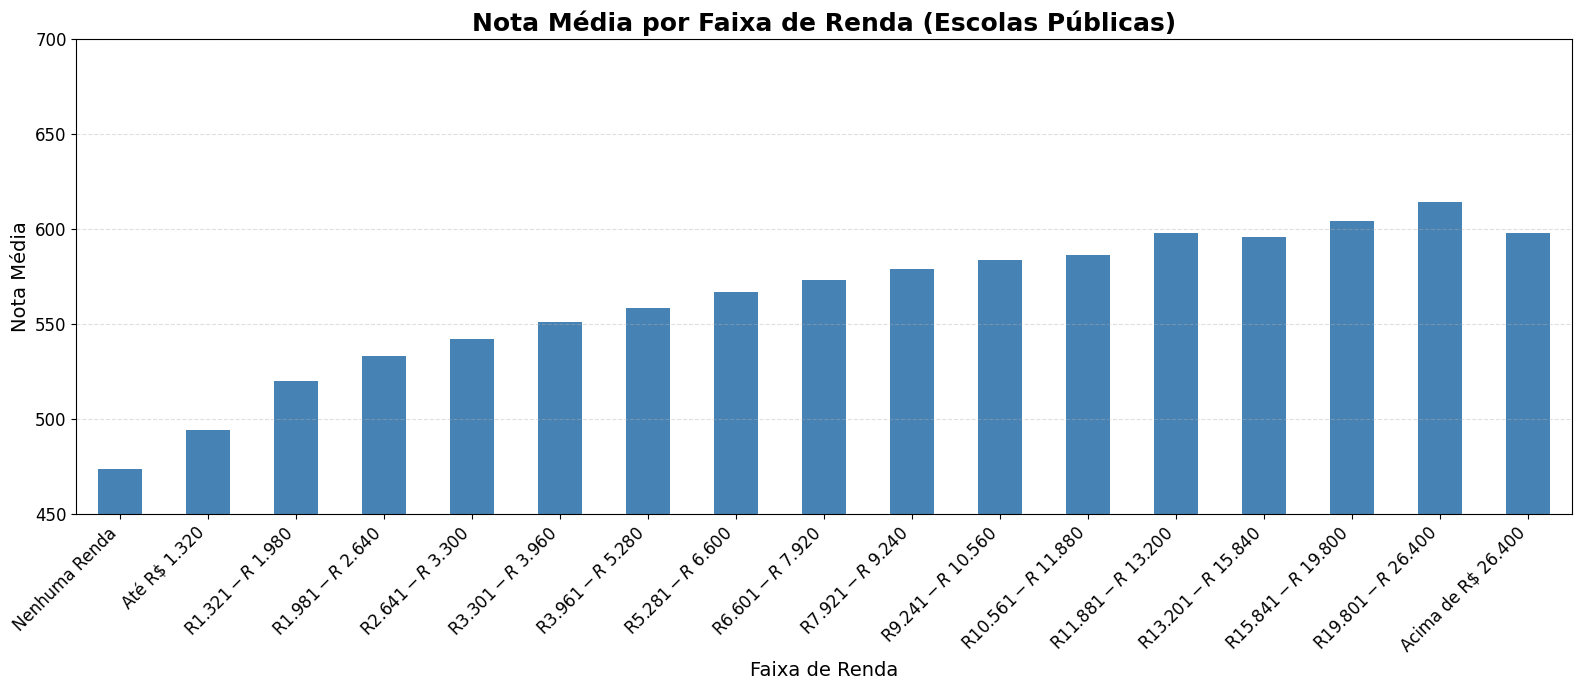

In [48]:
df_publica = df[df['TP_ESCOLA'] == 'Publica']


ordem_renda = [
    'Nenhuma Renda',
    'Até R$ 1.320',
    'R$ 1.321 - R$ 1.980',
    'R$ 1.981 - R$ 2.640',
    'R$ 2.641 - R$ 3.300',
    'R$ 3.301 - R$ 3.960',
    'R$ 3.961 - R$ 5.280',
    'R$ 5.281 - R$ 6.600',
    'R$ 6.601 - R$ 7.920',
    'R$ 7.921 - R$ 9.240',
    'R$ 9.241 - R$ 10.560',
    'R$ 10.561 - R$ 11.880',
    'R$ 11.881 - R$ 13.200',
    'R$ 13.201 - R$ 15.840',
    'R$ 15.841 - R$ 19.800',
    'R$ 19.801 - R$ 26.400',
    'Acima de R$ 26.400'
]


media_renda_publica = df_publica.groupby('Q006')['NOTA_MEDIA'].mean().reindex(ordem_renda)


plt.figure(figsize=(16,7))
media_renda_publica.plot(kind='bar', color='#4682B4')

plt.title('Nota Média por Faixa de Renda (Escolas Públicas)', fontsize=18, weight='bold')
plt.xlabel('Faixa de Renda', fontsize=14)
plt.ylabel('Nota Média', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)


min_y = max(0, int(media_renda_publica.min() // 50 * 50))
max_y = int(media_renda_publica.max() // 50 * 50 + 100)
plt.ylim(min_y, max_y)


plt.tight_layout()
plt.show()


**Essa, em minha opinião, é a análise mais interessante, verificamos uma linearidade entre renda média e nota média dos participantes.**

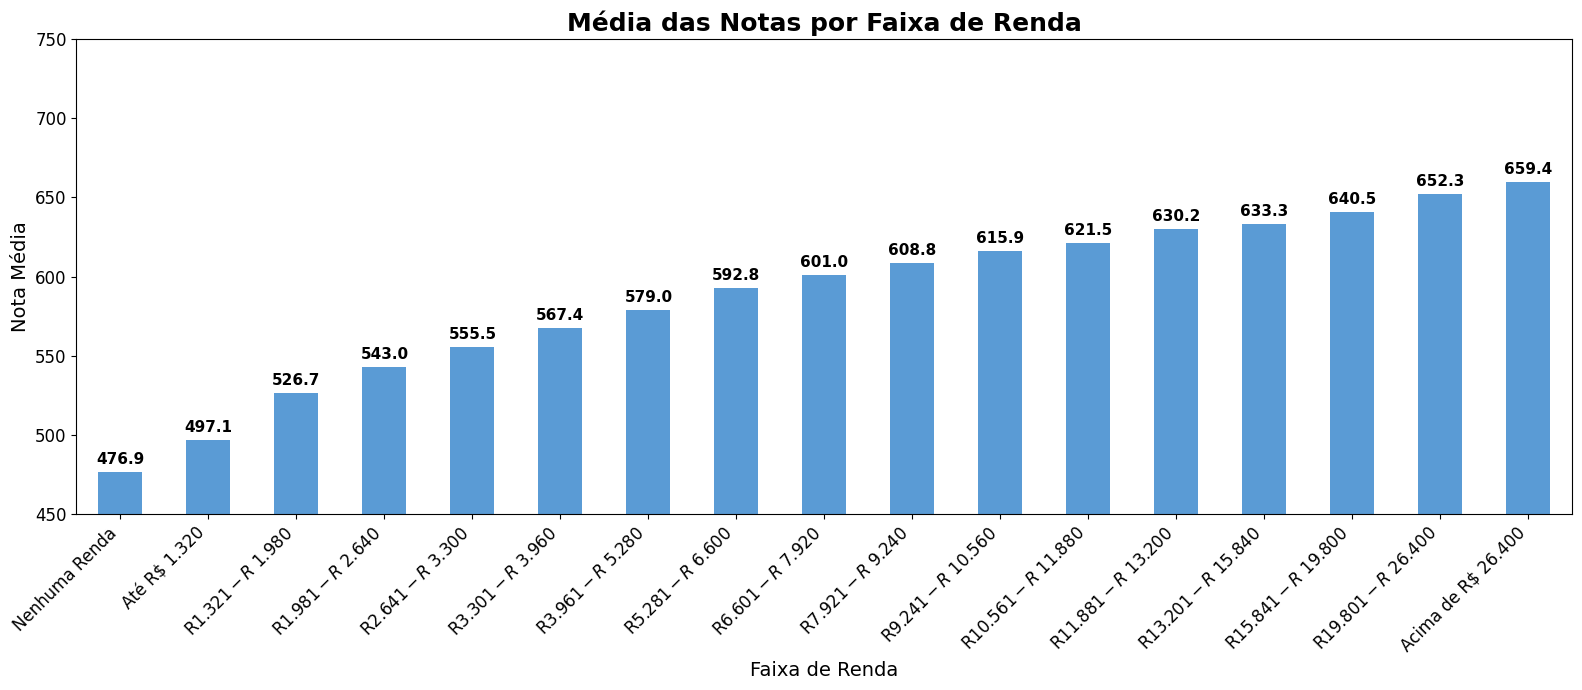

In [74]:
ordem_renda = [
    'Nenhuma Renda',
    'Até R$ 1.320',
    'R$ 1.321 - R$ 1.980',
    'R$ 1.981 - R$ 2.640',
    'R$ 2.641 - R$ 3.300',
    'R$ 3.301 - R$ 3.960',
    'R$ 3.961 - R$ 5.280',
    'R$ 5.281 - R$ 6.600',
    'R$ 6.601 - R$ 7.920',
    'R$ 7.921 - R$ 9.240',
    'R$ 9.241 - R$ 10.560',
    'R$ 10.561 - R$ 11.880',
    'R$ 11.881 - R$ 13.200',
    'R$ 13.201 - R$ 15.840',
    'R$ 15.841 - R$ 19.800',
    'R$ 19.801 - R$ 26.400',
    'Acima de R$ 26.400'
]


media_por_renda = df.groupby('Q006')['NOTA_MEDIA'].mean().reindex(ordem_renda)

plt.figure(figsize=(16,7))


media_por_renda.plot(kind='bar', color='#5A9BD5')


plt.title('Média das Notas por Faixa de Renda', fontsize=18, weight='bold')
plt.xlabel('Faixa de Renda', fontsize=14)
plt.ylabel('Nota Média', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)


plt.grid(axis='y', linestyle='', alpha=0.4)


min_y = max(0, int(media_por_renda.min() // 50 * 50))
max_y = int(media_por_renda.max() // 50 * 50 + 100)
plt.ylim(min_y, max_y)


yticks = np.arange(min_y, max_y + 1, 50)
if len(yticks) > 10:
    yticks = np.linspace(min_y, max_y, 6, dtype=int)
plt.yticks(yticks, fontsize=12)


for i, v in enumerate(media_por_renda):
    plt.text(i, v + 5, f"{v:.1f}", ha='center', fontsize=11, weight='bold')

plt.tight_layout()
plt.show()


# Análise do impacto do Acesso à internet

Dentre as 25 perguntas do questionário socioeconômico, selecionei duas que considero especialmente relevantes para o modelo de predição:

*  Q006 – referente à renda familiar do participante.
* Q025 – que trata do acesso à internet.



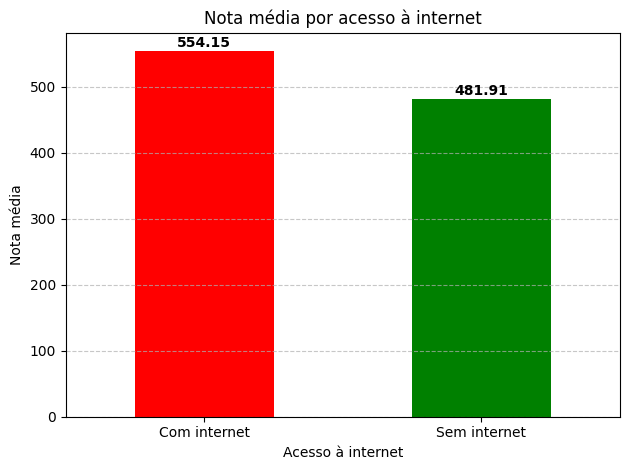

In [49]:
import pandas as pd
import matplotlib.pyplot as plt


media_por_acesso = df.groupby('Q025')['NOTA_MEDIA'].mean()


media_por_acesso.plot(kind='bar', color=['red', 'green'])

plt.title('Nota média por acesso à internet')
plt.xlabel('Acesso à internet')
plt.ylabel('Nota média')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, valor in enumerate(media_por_acesso):
    plt.text(i, valor + 1, f'{valor:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


In [55]:
acesso_internet = {
  'Com internet' : 1,
  'Sem internet' : 0
}
df['Q025'] = df['Q025'].replace(acesso_internet).infer_objects(copy=False)

In [53]:
df_analise = df[['Renda_estimada', 'NOTA_MEDIA', 'Q025']]

Abaixo, apresentamos a análise de correlação entre renda estimada, nota média e acesso à internet. Valores próximos de 1 indicam correlação perfeita, ou seja, as variáveis se comportam de forma semelhante. Já valores próximos de 0 indicam ausência de correlação ou uma relação inversa entre as variáveis

In [54]:
df_analise.corr()

,Renda_estimada,NOTA_MEDIA,Q025
Renda_estimada,1.000000,0.434347,0.169648
NOTA_MEDIA,0.434347,1.000000,0.188961
Q025,0.169648,0.188961,1.000000


# Análise das diferentes áreas da prova e suas correlações

In [66]:
df_analise = df[['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CN', 'NU_NOTA_REDACAO', 'NU_NOTA_CH']]

In [67]:
df_analise.corr()

,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO,NU_NOTA_CH
NU_NOTA_MT,1.000000,0.665491,0.699129,0.535960,0.685223
NU_NOTA_LC,0.665491,1.000000,0.654001,0.539645,0.780751
NU_NOTA_CN,0.699129,0.654001,1.000000,0.482701,0.675902
NU_NOTA_REDACAO,0.535960,0.539645,0.482701,1.000000,0.541725
NU_NOTA_CH,0.685223,0.780751,0.675902,0.541725,1.000000


Essa análise revela um insight interessante: as disciplinas do primeiro dia (Ciências Humanas e Linguagens) apresentam uma correlação de 0,78, enquanto as do segundo dia têm uma correlação próxima de 0,7. Embora isso possa parecer óbvio, confirma que é menos provável que um estudante tenha um desempenho ruim em uma matéria e se saia bem na outra no mesmo dia. Além disso, em uma análise preliminar, espera-se que estudantes com bom domínio em linguagens obtenham notas maiores em redação, porém essa correlação não é tão evidente nos dados.

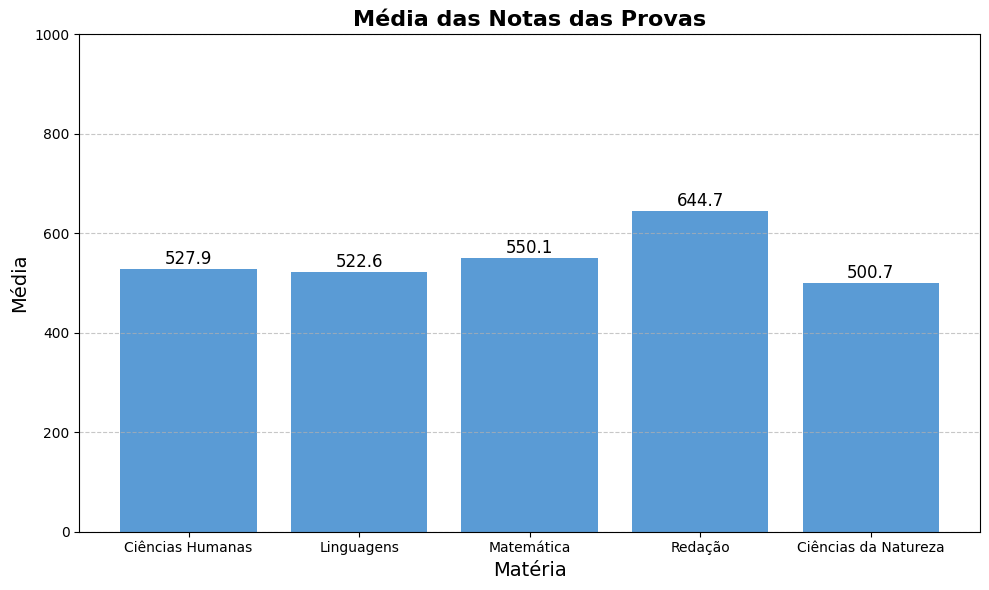

In [73]:
import matplotlib.pyplot as plt

# Colunas originais
colunas = ['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_CN']

# Médias calculadas
medias = df[colunas].mean()

# Renomeando para nomes mais amigáveis
nomes_materias = ['Ciências Humanas', 'Linguagens', 'Matemática', 'Redação', 'Ciências da Natureza']

plt.figure(figsize=(10,6))
bars = plt.bar(nomes_materias, medias.values, color='#5A9BD5')

plt.title('Média das Notas das Provas', fontsize=16, weight='bold')
plt.xlabel('Matéria', fontsize=14)
plt.ylabel('Média', fontsize=14)
plt.ylim(0, 1000)  # ajuste conforme o máximo esperado das notas

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona os valores em cima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, f'{yval:.1f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()


Essa análise pode levar a uma interpretação equivocada: por conta da TRI do ENEM, pode parecer que os estudantes, em geral, têm um desempenho superior em Matemática em relação à Ciencias Humanas, Linguagens e Ciências da Natureza. No entanto, a análise a seguir nos oferece uma nova perspectiva sobre esse cenário.

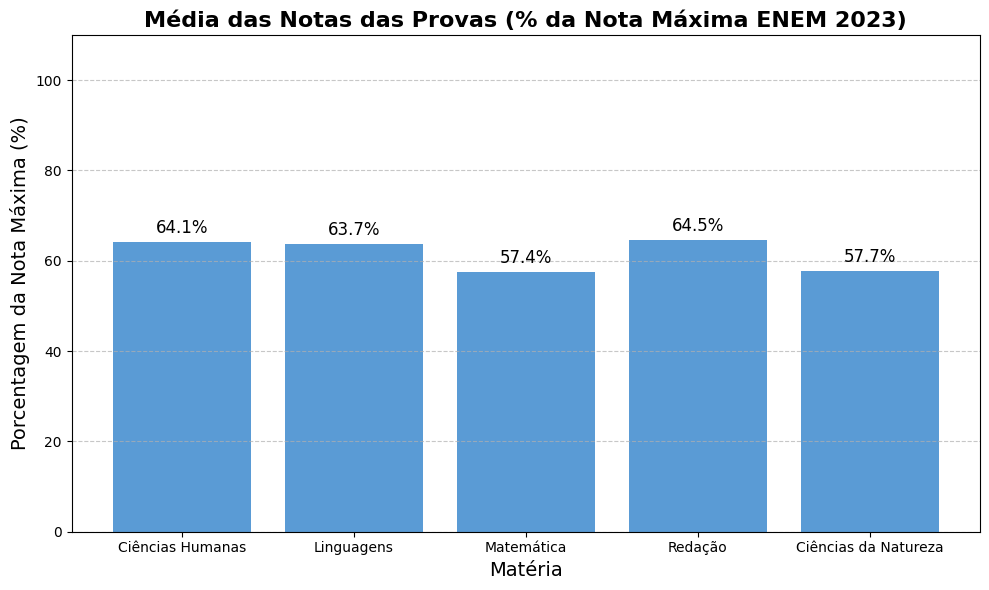

In [72]:
import matplotlib.pyplot as plt


colunas = ['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_CN']

medias = df[colunas].mean()


notas_maximas = {
    'NU_NOTA_CH': 823.0,
    'NU_NOTA_LC': 820.8,
    'NU_NOTA_MT': 958.6,
    'NU_NOTA_REDACAO': 1000.0,
    'NU_NOTA_CN': 868.4

}


proporcao = []
for col in colunas:
    prop = (medias[col] / notas_maximas[col]) * 100
    proporcao.append(prop)


nomes_materias = ['Ciências Humanas', 'Linguagens', 'Matemática', 'Redação', 'Ciências da Natureza']

plt.figure(figsize=(10,6))
bars = plt.bar(nomes_materias, proporcao, color='#5A9BD5')

plt.title('Média das Notas das Provas (% da Nota Máxima ENEM 2023)', fontsize=16, weight='bold')
plt.xlabel('Matéria', fontsize=14)
plt.ylabel('Porcentagem da Nota Máxima (%)', fontsize=14)
plt.ylim(0, 110)

plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval:.1f}%', ha='center', fontsize=12)

plt.tight_layout()
plt.show()


Essa análise das porcentagens em relação à nota máxima é bastante relevante, pois, devido à TRI, áreas como Matemática e Redação tendem a exercer maior influência em médias simples. Por isso, é fundamental observar como cada área se posiciona proporcionalmente dentro do seu respectivo intervalo máximo. O que torna essa análise ainda mais interessante é o contraste observado: embora Matemática apresente a maior média absoluta entre as disciplinas, quando analisada em termos percentuais em
relação à nota máxima, ela passa a ter o pior desempenho proporcional.

# Análise das redações

Agora, ao analisarmos as redações zeradas, identificamos as principais causas responsáveis pela anulação da nota

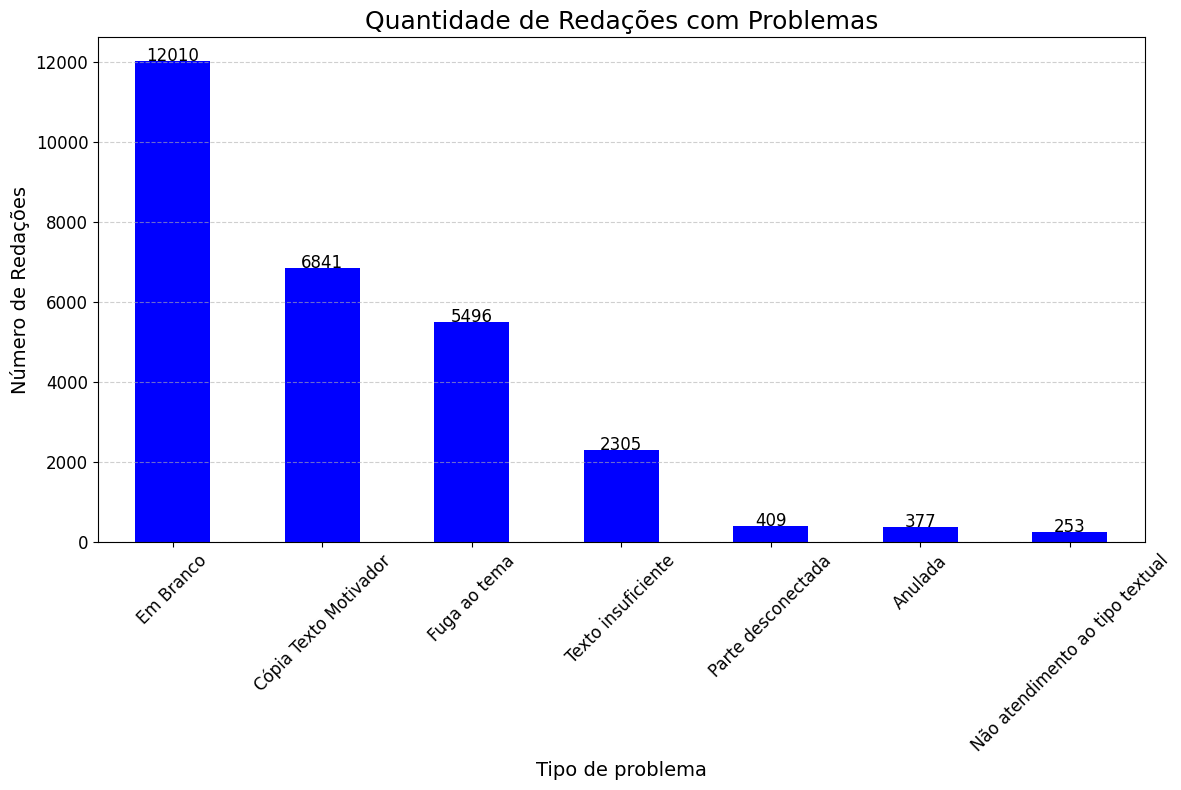

In [80]:
import matplotlib.pyplot as plt

df_problemas = df[df['TP_STATUS_REDACAO'] != 'Sem problemas']

contagem = df_problemas['TP_STATUS_REDACAO'].value_counts()

fig, ax = plt.subplots(figsize=(12, 8))

contagem.plot(kind='bar', color='blue', ax=ax)

ax.set_title('Quantidade de Redações com Problemas', fontsize=18)
ax.set_xlabel('Tipo de problema', fontsize=14)
ax.set_ylabel('Número de Redações', fontsize=14)
ax.tick_params(axis='x', rotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 5,
            f'{int(height)}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()


In [79]:
print(f"Média da nota da redação: {df['NU_NOTA_REDACAO'].mean():.2f}")

Média da nota da redação: 644.74


In [78]:
df_redacao_sem_zeros = df[df['NU_NOTA_REDACAO'] != 0]
print(f"Média da nota da redação: {df_redacao_sem_zeros['NU_NOTA_REDACAO'].mean():.2f}")

Média da nota da redação: 670.65


Outra análise relevante, excluindo as redações zeradas, há um aumento de cerca de 26 pontos na média das redações.

# Análise das regiões, seus desempenhos e renda

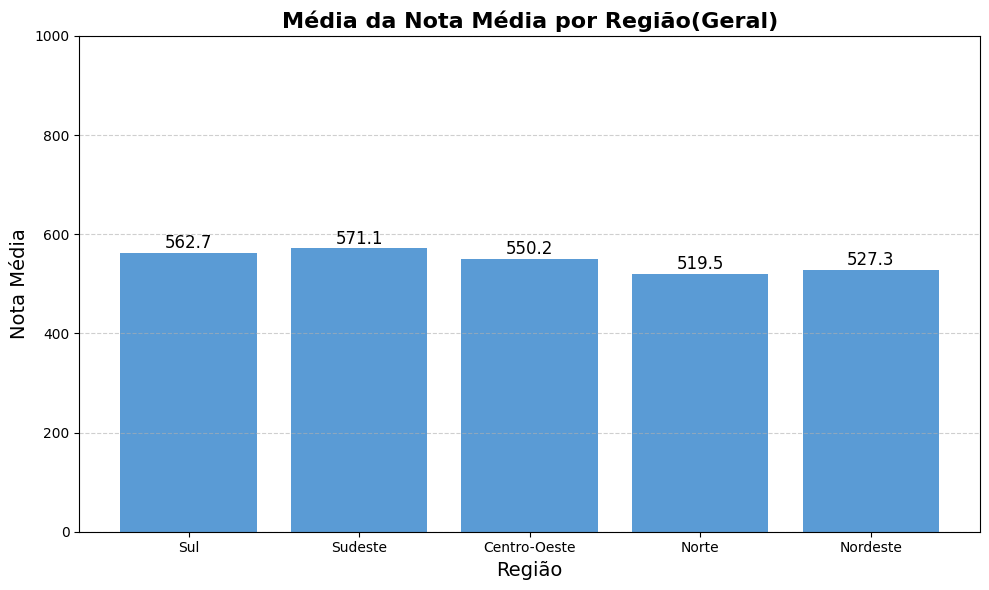

In [95]:
ordem_regioes = ['Sul', 'Sudeste', 'Centro-Oeste', 'Norte', 'Nordeste']

media_por_regiao = df.groupby('REGIAO')['NOTA_MEDIA'].mean()

media_por_regiao = media_por_regiao.reindex(ordem_regioes)

# Plotagem
plt.figure(figsize=(10,6))
bars = plt.bar(media_por_regiao.index, media_por_regiao.values, color='#5A9BD5')

plt.title('Média da Nota Média por Região(Geral)', fontsize=16, weight='bold')
plt.xlabel('Região', fontsize=14)
plt.ylabel('Nota Média', fontsize=14)
plt.ylim(0, 1000)

plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adiciona os valores em cima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, f'{yval:.1f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()


Nessa análise de notas médias por região(Sem diferenciação entre públicas e privadas), temos uma amplitude de 51,6 pontos.

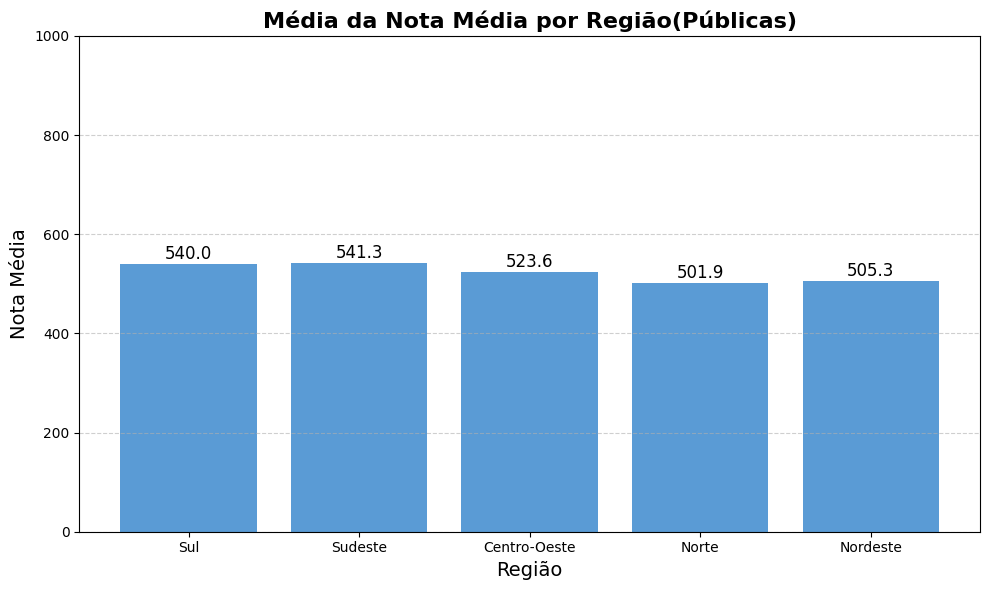

In [94]:
df_notas_publicas = df[df['TP_ESCOLA'] == 'Publica']

ordem_regioes = ['Sul', 'Sudeste', 'Centro-Oeste', 'Norte', 'Nordeste']

media_por_regiao_publica = df_notas_publicas.groupby('REGIAO')['NOTA_MEDIA'].mean()

media_por_regiao_publica = media_por_regiao_publica.reindex(ordem_regioes)
plt.figure(figsize=(10,6))
bars = plt.bar(media_por_regiao_publica.index, media_por_regiao_publica.values, color='#5A9BD5')

plt.title('Média da Nota Média por Região(Públicas)', fontsize=16, weight='bold')
plt.xlabel('Região', fontsize=14)
plt.ylabel('Nota Média', fontsize=14)
plt.ylim(0, 1000)  # ajusta conforme a escala das notas

plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adiciona os valores em cima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, f'{yval:.1f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

Já nessa análise entre as escolas públicas de cada região, temos uma amplitude de 39,4 pontos

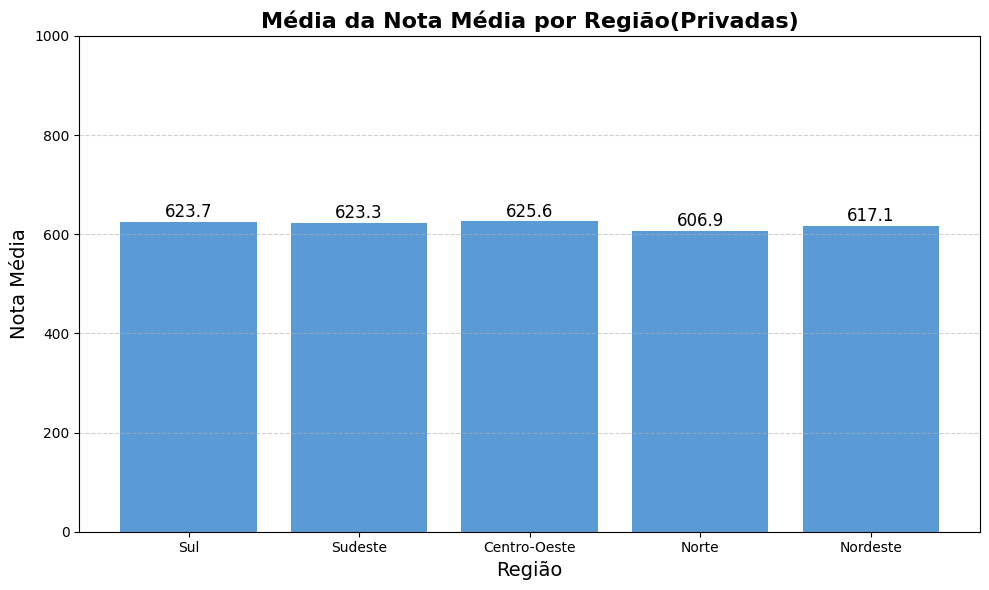

In [93]:
df_notas_privadas = df[df['TP_ESCOLA'] == 'Privada']

ordem_regioes = ['Sul', 'Sudeste', 'Centro-Oeste', 'Norte', 'Nordeste']

media_por_regiao_privada = df_notas_privadas.groupby('REGIAO')['NOTA_MEDIA'].mean()
media_por_regiao_privada = media_por_regiao_privada.reindex(ordem_regioes)
plt.figure(figsize=(10,6))
bars = plt.bar(media_por_regiao_privada.index, media_por_regiao_privada.values, color='#5A9BD5')

plt.title('Média da Nota Média por Região(Privadas)', fontsize=16, weight='bold')
plt.xlabel('Região', fontsize=14)
plt.ylabel('Nota Média', fontsize=14)
plt.ylim(0, 1000)  # ajusta conforme a escala das notas

plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adiciona os valores em cima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, f'{yval:.1f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

Já nessa análise entre as escolas privadas de cada região, temos uma amplitude de 18,7 pontos

Podemos concluir que as escolas privadas das regiões se aproximam muito mais na capacidade de ensino do que as públicas. Vale o destaque para as região norte tendo o menor desempenho em qualquer análise, além disso, o Sul lidera nas privadas, o que não ocorre nas médias gerais sem diferenciação.



Vamos analisar o desempenho das Instituições federais de ensino


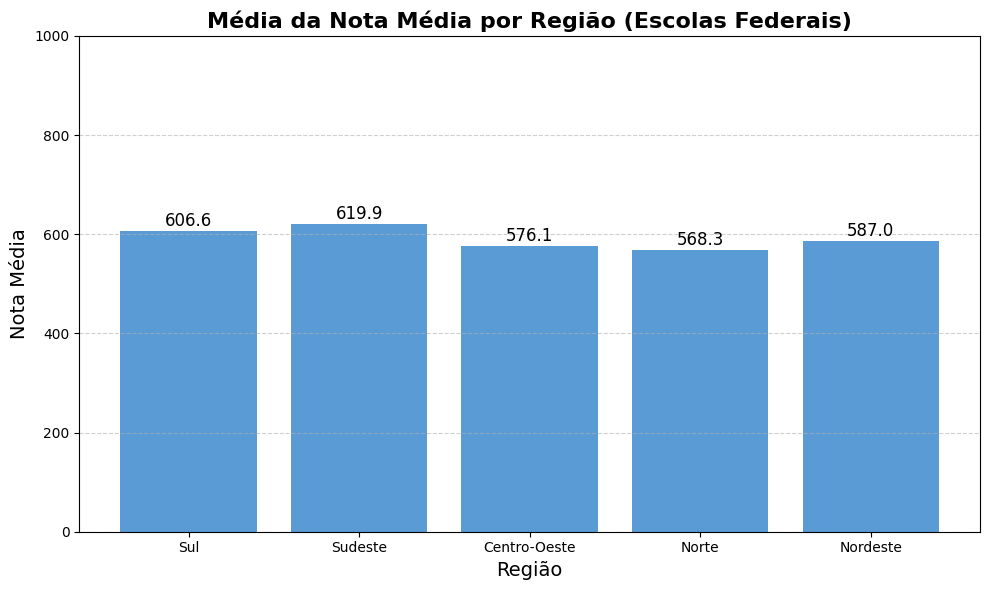

In [91]:
df_federais = df[df['TP_DEPENDENCIA_ADM_ESC'] == 'Federal']

ordem_regioes = ['Sul', 'Sudeste', 'Centro-Oeste', 'Norte', 'Nordeste']

media_por_regiao_federais = (
    df_federais.groupby('REGIAO')['NOTA_MEDIA']
    .mean()
    .reindex(ordem_regioes)
)


plt.figure(figsize=(10,6))
bars = plt.bar(media_por_regiao_federais.index, media_por_regiao_federais.values, color='#5A9BD5')

plt.title('Média da Nota Média por Região (Federais)', fontsize=16, weight='bold')
plt.xlabel('Região', fontsize=14)
plt.ylabel('Nota Média', fontsize=14)
plt.ylim(0, 1000)
plt.grid(axis='y', linestyle='--', alpha=0.6)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, f'{yval:.1f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()


Analisando somente as escolas federais temos um resultado interessante, um amplitude de 51,6 pontos.

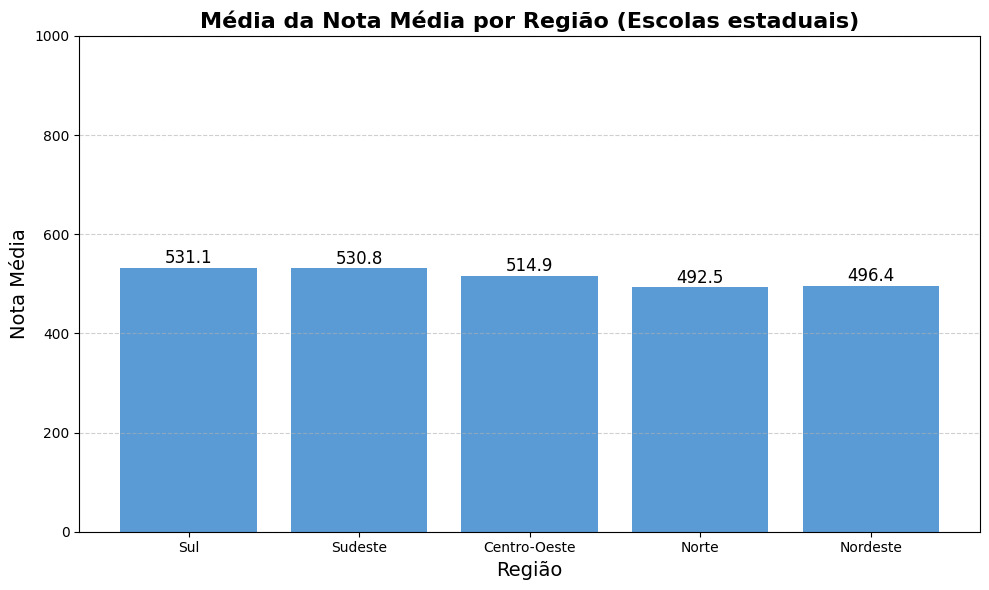

In [92]:
df_estaduais = df[df['TP_DEPENDENCIA_ADM_ESC'] == 'Estadual']

ordem_regioes = ['Sul', 'Sudeste', 'Centro-Oeste', 'Norte', 'Nordeste']

media_por_regiao_estaduais = (
    df_estaduais.groupby('REGIAO')['NOTA_MEDIA']
    .mean()
    .reindex(ordem_regioes)
)


plt.figure(figsize=(10,6))
bars = plt.bar(media_por_regiao_estaduais.index, media_por_regiao_estaduais.values, color='#5A9BD5')

plt.title('Média da Nota Média por Região (Estaduais)', fontsize=16, weight='bold')
plt.xlabel('Região', fontsize=14)
plt.ylabel('Nota Média', fontsize=14)
plt.ylim(0, 1000)
plt.grid(axis='y', linestyle='--', alpha=0.6)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, f'{yval:.1f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()


Nessa análise, o Sul lidera a pontuação novamente, e temos uma amplitude de 34,7 pontos.
